## Project Stage - IV (Dashboard)

## Goals

The final stage aims a developing a simple interactive dashboard based on the analysis you have done so far. In this we will be utilizing Plotly (https://plotly.com/) along with Dash (https://plotly.com/dash/) as our framework. 

*PS: This can be invoked from Jupyter, see here: https://medium.com/plotly/introducing-jupyterdash-811f1f57c02e*

### Tasks:

#### Task 1: (70 pts)
- Team: (30)
    - Main graph
        - Allow for selection of date to show the trend of COVID-19 cases
        - Allow for linear or log mode selection
        - Allow for number of cases or number of deaths
        - Incorporate your best model prediction trend line
        - Ex: https://ourworldindata.org/coronavirus
#### Task 2: (30 pts)
- Team: (30)
    - Map 
        - Show US map of cases or deaths 
        - Ex: https://coronavirus.jhu.edu/us-map
    

**Deliverable**
- Take screenshots of Report upload on canvas.
- Each member creates separate notebooks for member tasks. Upload all notebooks to Github Repository. 

## Deadline: 10/22/2020

### Task 1:

In [1]:
import pandas as pd
import dash
import plotly.express as px
from jupyter_dash import JupyterDash
import dash_html_components as html
import dash_core_components as dcc
from dash.dependencies import Input, Output
import numpy as np
import matplotlib.pyplot as plt

In [3]:
case_raw=pd.read_csv('../../Data/Input/covid_confirmed_usafacts.csv')
death_raw=pd.read_csv('../../Data/Input/covid_deaths_usafacts.csv')

In [4]:
case_raw=case_raw[case_raw['countyFIPS']>0]
death_raw=death_raw[death_raw['countyFIPS']>0]

In [5]:
case_sum = case_raw.groupby(by='State').sum()
death_sum = death_raw.groupby(by='State').sum()

In [6]:
case_sum.head()

,countyFIPS,stateFIPS,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20
State,,,,,,,,,,,,,,,,,,,,,
AK,64610,60,0,0,0,0,0,0,0,0,...,17065,17590,18190,18707,19179,19704,20199,20680,21267,22004
AL,71489,67,0,0,0,0,0,0,0,0,...,199158,200713,202482,203687,204856,206567,208636,210637,213617,215843
AR,380625,375,0,0,0,0,0,0,0,0,...,115761,117519,119073,119998,120879,122388,124249,125993,128180,130060
AZ,60208,60,0,0,0,0,1,1,1,1,...,252767,254763,257384,259264,259681,263133,265163,266562,269577,273053
CA,357364,354,0,0,0,0,2,3,3,4,...,956986,963768,969090,973743,981493,990096,995487,1005994,1015809,1023575


In [7]:
case_county=case_sum[case_sum.columns[2:]]

In [8]:
death_county=death_sum[death_sum.columns[2:]]

In [9]:
case_county_=case_county.T
death_county_=death_county.T

In [10]:
case_county_.head()

State,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1/26/20,0,0,0,1,2,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [11]:
newcase_county=case_county_.diff()
newcase_county.iloc[0]=case_county_.iloc[0]

In [12]:
newdeath_county=death_county_.diff()
newdeath_county.iloc[0]=death_county_.iloc[0]

In [13]:
newcase_county.head()

State,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
1/22/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1/23/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/24/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/25/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/26/20,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
newcase_county=newcase_county.append([0])
newcase_county=newcase_county[newcase_county.columns[0:-1]]
newcase_county

,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
1/22/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1/23/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/24/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/25/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/26/20,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11/11/20,495.0,2069.0,1861.0,2030.0,5391.0,3974.0,1727.0,206.0,241.0,5803.0,...,1362.0,3443.0,11115.0,2294.0,1594.0,73.0,0.0,7535.0,0.0,0.0
11/12/20,481.0,2001.0,1744.0,1399.0,10507.0,5198.0,1157.0,128.0,193.0,5612.0,...,2020.0,3273.0,8804.0,3820.0,1522.0,116.0,3293.0,8225.0,1581.0,1107.0
11/13/20,587.0,2980.0,2187.0,3015.0,9815.0,6440.0,2686.0,159.0,470.0,6934.0,...,1611.0,3504.0,11302.0,2507.0,1237.0,92.0,2175.0,8451.0,741.0,862.0
11/14/20,737.0,2226.0,1880.0,3476.0,7766.0,5196.0,0.0,148.0,380.0,4524.0,...,1855.0,4314.0,9415.0,4057.0,1540.0,100.0,2242.0,5581.0,1154.0,1153.0


In [15]:
from sklearn.model_selection import train_test_split
import sklearn.tree
for idx,state in enumerate(newcase_county.columns):
    tem=pd.DataFrame()
    tem['case']=newcase_county[state][:-1]
    tem['DAFC']=range(0,len(tem))
    X= tem['DAFC'].values.reshape(-1,1)
    y = tem['case'].values.reshape(-1,1)
    dt = sklearn.tree.DecisionTreeRegressor()
    dt.fit(X,y)
    newcase_county.loc[0][state]=dt.predict([[len(tem)]])

In [16]:
newcase_county

,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
1/22/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1/23/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/24/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/25/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/26/20,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11/11/20,495.0,2069.0,1861.0,2030.0,5391.0,3974.0,1727.0,206.0,241.0,5803.0,...,1362.0,3443.0,11115.0,2294.0,1594.0,73.0,0.0,7535.0,0.0,0.0
11/12/20,481.0,2001.0,1744.0,1399.0,10507.0,5198.0,1157.0,128.0,193.0,5612.0,...,2020.0,3273.0,8804.0,3820.0,1522.0,116.0,3293.0,8225.0,1581.0,1107.0
11/13/20,587.0,2980.0,2187.0,3015.0,9815.0,6440.0,2686.0,159.0,470.0,6934.0,...,1611.0,3504.0,11302.0,2507.0,1237.0,92.0,2175.0,8451.0,741.0,862.0
11/14/20,737.0,2226.0,1880.0,3476.0,7766.0,5196.0,0.0,148.0,380.0,4524.0,...,1855.0,4314.0,9415.0,4057.0,1540.0,100.0,2242.0,5581.0,1154.0,1153.0


In [17]:
newdeath_county=newdeath_county.append([0])
newdeath_county=newdeath_county[newdeath_county.columns[0:-1]]
newdeath_county

,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
1/22/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/23/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/24/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/25/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/26/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11/25/20,0.0,60.0,21.0,9.0,104.0,46.0,45.0,4.0,1.0,90.0,...,28.0,84.0,200.0,24.0,30.0,0.0,15.0,64.0,12.0,13.0
11/26/20,0.0,41.0,11.0,46.0,54.0,50.0,0.0,0.0,3.0,0.0,...,0.0,53.0,206.0,0.0,20.0,0.0,0.0,62.0,23.0,0.0
11/27/20,0.0,0.0,0.0,20.0,62.0,21.0,35.0,0.0,1.0,116.0,...,39.0,10.0,51.0,13.0,15.0,3.0,0.0,17.0,0.0,0.0
11/28/20,0.0,0.0,13.0,36.0,37.0,6.0,0.0,1.0,6.0,79.0,...,54.0,14.0,102.0,14.0,13.0,0.0,0.0,28.0,6.0,0.0


In [18]:
for idx,state in enumerate(newdeath_county.columns):
    tem=pd.DataFrame()
    tem['case']=newdeath_county[state][:-1]
    tem['DAFC']=range(0,len(tem))
    X= tem['DAFC'].values.reshape(-1,1)
    y = tem['case'].values.reshape(-1,1)
    dt = sklearn.tree.DecisionTreeRegressor()
    dt.fit(X,y)
    newdeath_county.loc[0][state]=dt.predict([[len(tem)]])

In [19]:
newdeath_county

,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
1/22/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/23/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/24/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/25/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/26/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11/25/20,0.0,60.0,21.0,9.0,104.0,46.0,45.0,4.0,1.0,90.0,...,28.0,84.0,200.0,24.0,30.0,0.0,15.0,64.0,12.0,13.0
11/26/20,0.0,41.0,11.0,46.0,54.0,50.0,0.0,0.0,3.0,0.0,...,0.0,53.0,206.0,0.0,20.0,0.0,0.0,62.0,23.0,0.0
11/27/20,0.0,0.0,0.0,20.0,62.0,21.0,35.0,0.0,1.0,116.0,...,39.0,10.0,51.0,13.0,15.0,3.0,0.0,17.0,0.0,0.0
11/28/20,0.0,0.0,13.0,36.0,37.0,6.0,0.0,1.0,6.0,79.0,...,54.0,14.0,102.0,14.0,13.0,0.0,0.0,28.0,6.0,0.0


In [63]:
#App layout
app=JupyterDash(__name__)

# the style arguments for the sidebar. We use position:fixed and a fixed width
SIDEBAR_STYLE = {
    "position": "fixed",
    "top": 0,
    "left": 0,
    "bottom": 0,
    "width": "4rem",
    "padding": "2rem 1rem",
    "background-color": "#f8f9fa",
    'overflowY':'scroll',
}

# the styles for the main content position it to the right of the sidebar and
# add some padding.
CONTENT_STYLE = {
    "margin-left": "5rem",
     "margin-right": "2rem",
     "padding": "2rem 1rem",
}

sidebar = html.Div([
    html.H5("Choose Counties",style={'text-align':'left'}),
    dcc.Checklist(id='checklist',options=[{'label':c,'value':c} for c in newdeath_county.columns[1:]],
                  value=["TX"])
    
], style=SIDEBAR_STYLE)
content=html.Div([
    html.H1("Covid19 Team Project Stage IV",style={'text-align':'center'}),
    dcc.Dropdown(id='case_death',options=[{"label":"Case","value":"case"},
                                          {"label":"Death","value":"death"}
                                         ],multi=False,value="case",style={'width':"30%"}),
    dcc.RadioItems(id='log',options=[{"label":"LINEAR","value":"LINEAR"},
                                          {"label":"LOG","value":"LOG"}
                                         ],value="LINEAR",style={'display':'inline-block'}),
    dcc.Graph(id='output_trend')
],style=CONTENT_STYLE)

app.layout=html.Div([sidebar,content])

# Connect the Plotly graphs with Dash Components
@app.callback(
    Output(component_id='output_trend', component_property='figure'),
    [Input(component_id='checklist', component_property='value'),
     Input(component_id='case_death', component_property='value'),
     Input(component_id='log', component_property='value')]
)
def update_graph(checklist,option_slctd,linear_log):
    # Plotly Express
    if(option_slctd=='case'):
        if(linear_log=='LINEAR'):
            fig = px.line(data_frame=newcase_county, x=newcase_county.index, y=[newcase_county[c] for c in checklist], title='COVID19 Daily Case Trend')
            #implenting the moving avg line
            moving_avg =newcase_county['TX'].rolling(window=7).mean()
            fig.add_scatter(x=newcase_county.index, y=moving_avg, mode='lines')
        else:
            fig = px.line(data_frame=newcase_county, x=newcase_county.index, y=[newcase_county[c] for c in checklist], title='COVID19 Daily Case Trend',log_y=True)
            #implenting the moving avg line
            moving_avg =newcase_county['TX'].rolling(window=7).mean()
            fig.add_scatter(x=newcase_county.index, y=moving_avg, mode='lines')
    else:
        if(linear_log=='LINEAR'):
            fig = px.line(data_frame=newdeath_county, x=newdeath_county.index, y=[newdeath_county[c] for c in checklist],title='COVID19 Daily Death Trend')
            #implenting the moving avg line
            moving_avg =newdeath_county['TX'].rolling(window=7).mean()
            fig.add_scatter(x=newcase_county.index, y=moving_avg, mode='lines')
        else:
            fig = px.line(data_frame=newdeath_county, x=newdeath_county.index, y=[newdeath_county[c] for c in checklist],title='COVID19 Daily Death Trend',log_y=True)
            #implenting the moving avg line
            moving_avg =newdeath_county['TX'].rolling(window=7).mean()
            fig.add_scatter(x=newcase_county.index, y=moving_avg, mode='lines')
    return fig

app.run_server(mode='inline',port=8051)

### the last y-value for x-value 0 is the prediction for next day. The index is  a little bit small, please zoom in to see. 

<AxesSubplot:>

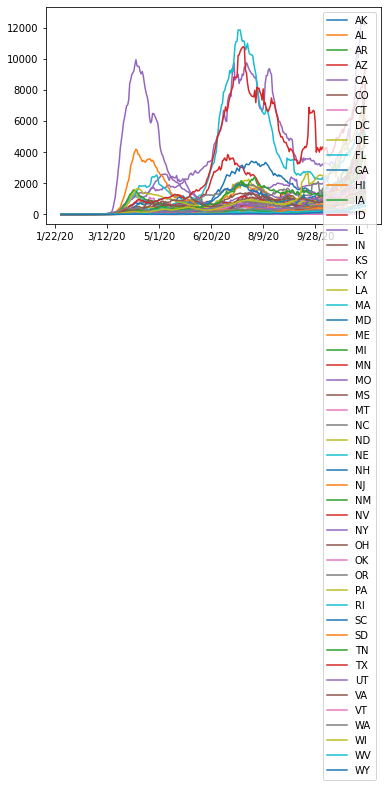

In [58]:
newcase_county.rolling(window=7).mean().plot()

### Rolling average of cases (7-day) of every state

<AxesSubplot:>

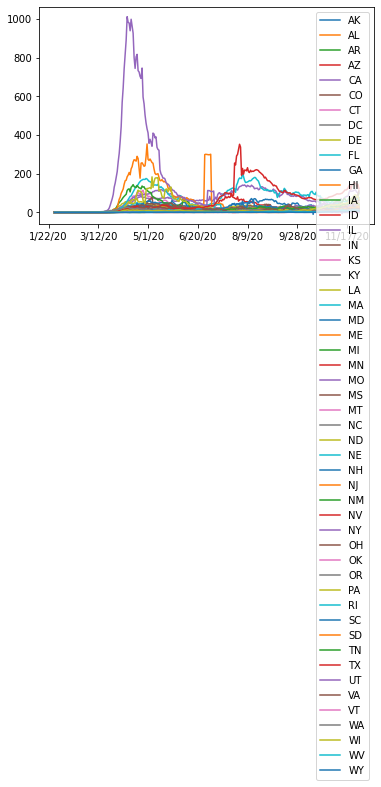

In [59]:
newdeath_county.rolling(window=7).mean().plot()

### Rolling average of deaths (7-day) of every state